<a href="https://colab.research.google.com/github/Stanleylarin/Programacion-3/blob/main/viernes17-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as tfds

In [2]:
dataset, metadata = tfds.load('mnist',as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"],dataset["test"]
print(datos_entrenamiento)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [5]:
numeros_letras = ["Cero", "Uno", "Dos", "Tres", "Cuatro", "Cinco", "Seis", "Siete", "Ocho", "Nueve"]

In [6]:
numeros_ejemplo_entrenamiento = metadata.splits["train"].num_examples
numeros_ejemplo_prueba = metadata.splits["test"].num_examples
print(numeros_ejemplo_entrenamiento, numeros_ejemplo_prueba)

60000 10000


In [7]:
def normalizacion(images,labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [8]:
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [9]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [11]:
batchsize = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(batchsize)
datos_prueba= datos_prueba.repeat().shuffle(numeros_ejemplo_prueba).batch(batchsize)

In [12]:
modelo.fit(datos_entrenamiento, epochs=5,
           steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/batchsize))

Epoch 1/5
1875/1875 [==============================] - 21s 6ms/step - loss: 0.2673 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1256 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0910 - accuracy: 0.9718
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0742 - accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0574 - accuracy: 0.9818


In [13]:
test_loss, test_accuracy =modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/batchsize))
print("Resultado de las pruebas", test_loss, test_accuracy)

313/313 [==============================] - 2s 3ms/step - loss: 0.0975 - accuracy: 0.9713
Resultado de las pruebas 0.09745451807975769 0.971345841884613


In [14]:
def graficar_imagen(i, predictions_array,true_labels,images):
  predictions_array, true_labels, img = predictions_array[i],true_labels[i],images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0],cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_labels:
   color = 'blue'
  else:
   plt.xlabel("Prediccion: {}".format(numeros_letras[predicted_label]), color=color)

In [15]:
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba=imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

def graficar_valores_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i],true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#888888")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

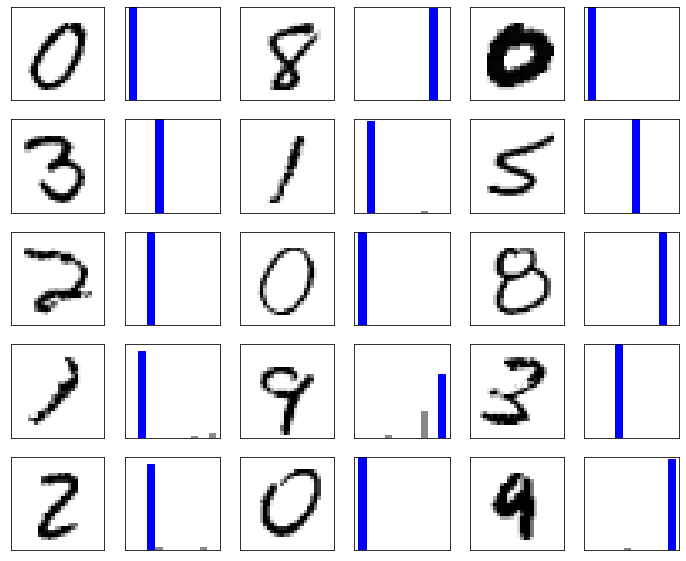

In [16]:
numrows=5
numcols=3
numimages = numrows*numcols


plt.figure(figsize=(2*2*numcols,2*numrows))
for i in range(numimages):
  plt.subplot(numrows,  2*numcols,  2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(numrows, 2*numcols,2*i+2)
  graficar_valores_array(i,predicciones,etiquetas_prueba)


plt.show()